# Simple k-nn implementation


In [0]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot

import pandas
import numpy


### Dataset Import


In [0]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

dataset = pandas.read_csv(url, names=names)  


### Data


In [16]:
dataset.head(3)


,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


### Pre processing


In [0]:
sample = dataset.iloc[:, :-1].values
target = dataset.iloc[:, 4].values


### Splitting in Train/Tests

In [0]:

sample_train, sample_test, target_train, target_test = train_test_split(sample, target, test_size=0.20)


### Data Normalizing

In [0]:
scaler = StandardScaler()  
scaler.fit(sample_train)

sample_train = scaler.transform(sample_train)
sample_test = scaler.transform(sample_test)


### Training


In [20]:
classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(sample_train, target_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

### Prediction

In [0]:
target_pred = classifier.predict(sample_test)


### Result availing


In [22]:
print(confusion_matrix(target_test, target_pred))  
print(classification_report(target_test, target_pred))  


[[ 8  0  0]
 [ 0  9  0]
 [ 0  1 12]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.90      1.00      0.95         9
 Iris-virginica       1.00      0.92      0.96        13

      micro avg       0.97      0.97      0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



### Grid Search


In [0]:
error = []
assertiveness = []

for i in range(1, 121):  
    knn = KNeighborsClassifier(n_neighbors=i, algorithm='brute')
    knn.fit(sample_train, target_train)
    pred_i = knn.predict(sample_test)
    error.append(numpy.mean(pred_i != target_test))
    assertiveness.append(numpy.mean(pred_i == target_test))


Text(0, 0.5, 'Mean Error | Assertiveness')

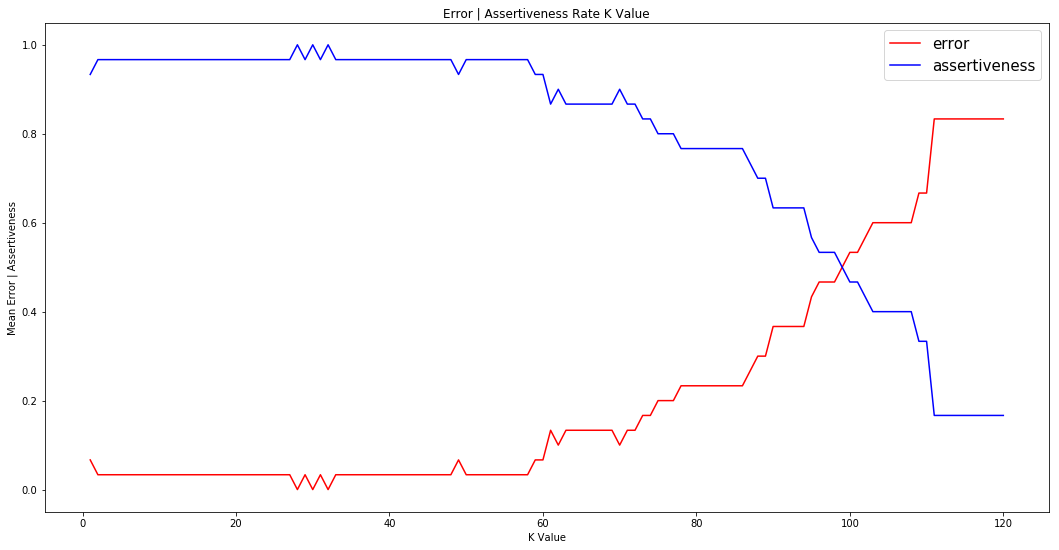

In [23]:
pyplot.figure(figsize=(18, 9))  
pyplot.plot(range(1, 121), error, color='red', linestyle='-', marker=' ', markerfacecolor='blue', markersize=10)
pyplot.plot(range(1, 121), assertiveness, color='blue', linestyle='-', marker=' ', markerfacecolor='blue', markersize=10)
pyplot.legend(['error', 'assertiveness'], loc='upper right', prop={'size': 15})
pyplot.title('Error | Assertiveness Rate K Value')  
pyplot.xlabel('K Value')  
pyplot.ylabel('Mean Error | Assertiveness')  
